#### Importowanie bibliotek

In [98]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import seaborn as sns

#### Wczytanie danych

In [77]:
data_hic = np.genfromtxt('cell1.txt', dtype='object', skip_header=1)

In [78]:
data_hic

array([[b'1', b'3023035', b'1', b'14942225'],
       [b'1', b'3065457', b'1', b'19796342'],
       [b'1', b'3312156', b'1', b'5315667'],
       ...,
       [b'X', b'165354581', b'X', b'165359148'],
       [b'X', b'166044486', b'X', b'166058486'],
       [b'X', b'166251418', b'X', b'166367164']], dtype=object)

#### Przefiltrowanie danych - wybranie chromosomu

In [110]:
chromosome_number = b'1' 
data_filtered = data_hic[(data_hic[:, 0] == chromosome_number) & (data_hic[:, 2] == chromosome_number)]

In [111]:
data_filtered

array([[b'1', b'3023035', b'1', b'14942225'],
       [b'1', b'3065457', b'1', b'19796342'],
       [b'1', b'3312156', b'1', b'5315667'],
       ...,
       [b'1', b'196642198', b'1', b'196692230'],
       [b'1', b'196820129', b'1', b'196821712'],
       [b'1', b'196941897', b'1', b'196953158']], dtype=object)

#### Tworzenie binów

In [112]:
data_filtered = data_filtered[:, [1, 3]].astype(int)
sample_genome_size = np.max(data_filtered) + 1
sample_genome_size

196957224

#### Rozmiar binów

In [113]:
bin_size = 1000000 #1Mb
num_bins = sample_genome_size // bin_size + 1

#### Sprawdzenie, że jest ok

In [114]:
for row in data_filtered:
    print(row[0], row[0]//bin_size)
    print(row[1], row[1]//bin_size)

3023035 3
14942225 14
3065457 3
19796342 19
3312156 3
5315667 5
3377904 3
24338979 24
3390558 3
20722058 20
3409175 3
4615209 4
3417953 3
3418788 3
3486876 3
5579145 5
3537059 3
4357966 4
3551972 3
5080897 5
3571322 3
35254205 35
3694136 3
7913063 7
3748416 3
3750470 3
3846483 3
4867177 4
3864975 3
24182724 24
3891598 3
4640041 4
3893005 3
13302500 13
3997518 3
5219347 5
4022160 4
43778995 43
4025153 4
62072688 62
4034504 4
64674379 64
4086765 4
16050615 16
4116675 4
21082249 21
4148839 4
6185735 6
4152876 4
21479568 21
4528623 4
49024025 49
4537547 4
13368340 13
4708886 4
23286266 23
4925714 4
16631117 16
4925713 4
4926858 4
4956712 4
64773074 64
5080735 5
5481329 5
5120498 5
21487204 21
5130418 5
16167259 16
5199771 5
59601048 59
5369878 5
64715922 64
5378793 5
5521365 5
5511615 5
8786683 8
5688403 5
11239319 11
5710184 5
21884544 21
5824561 5
30617259 30
5826932 5
65317922 65
5885871 5
15191723 15
5914659 5
5929574 5
5983031 5
65443084 65
5993601 5
33186018 33
5998564 5
33355154 33


#### Tworzenie macierzy kontaktów

In [115]:
contact_matrix = np.zeros((num_bins, num_bins))

for row in data_filtered:
    bin1 = row[0] // bin_size
    bin2 = row[1] // bin_size
    contact_matrix[bin1, bin2] += 1
    contact_matrix[bin2, bin1] += 1 

<Axes: >

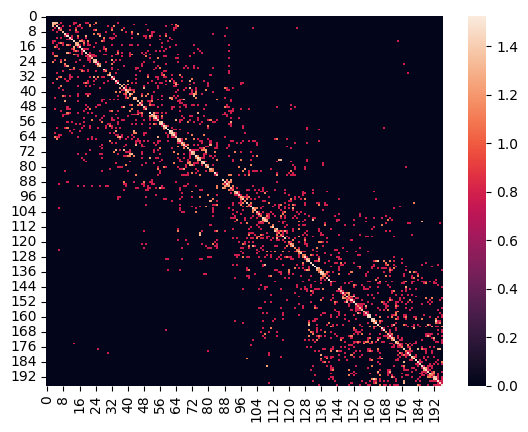

In [116]:
#sns.heatmap(contact_matrix)
sns.heatmap(np.arctan(contact_matrix))

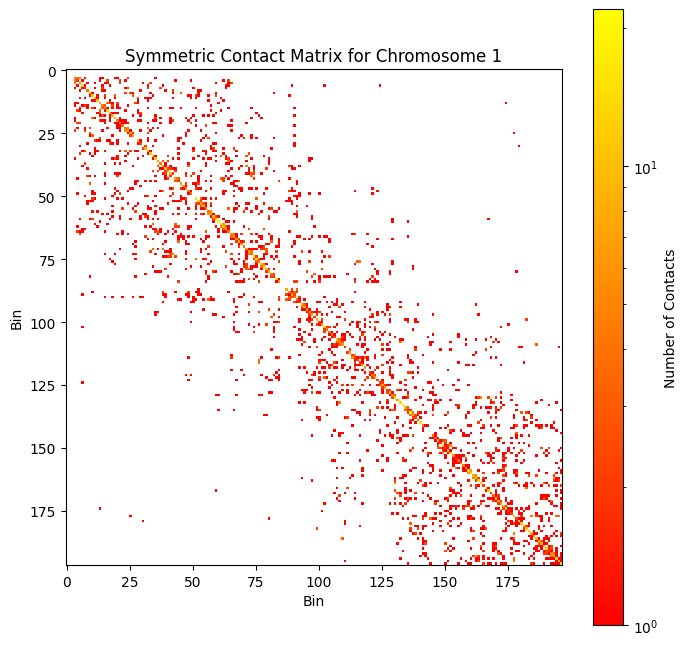

In [117]:
plt.figure(figsize=(8, 8))
plt.imshow(contact_matrix, cmap='autumn', interpolation='nearest', norm=LogNorm(vmin=1, vmax=np.max(contact_matrix)))
plt.colorbar(label='Number of Contacts')
plt.title(f'Symmetric Contact Matrix for Chromosome {chromosome_number.decode()}')
plt.xlabel('Bin')
plt.ylabel('Bin')
plt.show()

#### W jednej funkcji

In [155]:
def calc_contact_matrix(data_hic, chromosome_numbers):
    data_filtered = data_hic[np.isin(data_hic[:, 0].astype(str), chromosome_numbers) & np.isin(data_hic[:, 2].astype(str), chromosome_numbers)]
    data_filtered = data_filtered[:, [1, 3]].astype(int)
    sample_genome_size = np.max(data_filtered) + 1

    bin_size = 1000000 #1Mb
    num_bins = sample_genome_size // bin_size + 1
    
    contact_matrix = np.zeros((num_bins, num_bins))
    for row in data_filtered:
        bin1 = row[0] // bin_size
        bin2 = row[1] // bin_size
        contact_matrix[bin1, bin2] += 1
        contact_matrix[bin2, bin1] += 1 
    
    return contact_matrix
    


In [156]:
cm=calc_contact_matrix(data_hic, ['2', '3'])

<Axes: >

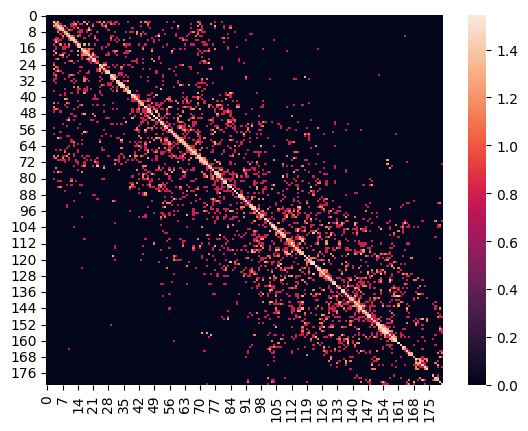

In [157]:
sns.heatmap(np.arctan(cm))